# Benchmarking on Test TSPs with Concorde

In [ ]:
!pip install pulp

     |████████████████████████████████| 40.6MB 117kB/s 


In [ ]:
!pip install dgl

     |████████████████████████████████| 3.0MB 4.4MB/s 


In [ ]:
!pip install git+https://github.com/jvkersch/pyconcorde

  Cloning https://github.com/jvkersch/pyconcorde to /tmp/pip-req-build-atqawfb9
  Running command git clone -q https://github.com/jvkersch/pyconcorde /tmp/pip-req-build-atqawfb9
  Created wheel for pyconcorde: filename=pyconcorde-0.1.0-cp36-cp36m-linux_x86_64.whl size=2077471 sha256=f1fc16feec68aa566424bb3ca4179e2db2f0c3d41f405eb4fe6aa9e0d00c0ecb
  Stored in directory: /tmp/pip-ephem-wheel-cache-w93buila/wheels/19/f7/b0/8275826a53bea795298f25759e989d82195a704d29faae37ec
Successfully built pyconcorde


In [ ]:
import actions_v12 as ac 
import benchmark_concorde_v3 as b_con
import time
import random 
import pandas as pd
from google.colab import files

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Valid inequalities version: 9
No hard restrictions for teeth assignments


**Benchmark class**

In [ ]:
class benchmark:
    def __init__(self, tsp_id, data_name, verbose):
        self.tsp_id = tsp_id
        self.data_name = data_name
        self.verbose = verbose

        #Change this
        self.instance1 = ac.tsp_instance_tsplib(self.tsp_id, self.data_name) 
    
        self.get_concorde(verbose)
      #  self.get_mip(verbose)
      #  self.get_random1(verbose)
      #  self.get_random2(verbose)
    
    def get_concorde(self, verbose):
        # 1st step: get optimal solution via Concorde
        self.con_complete_flag, self.con_optimal_value, self.con_time_diff, self.optimal_tour = b_con.concorde(self.instance1, verbose)
        print('Concorde s done:', self.tsp_id)
       
    def get_mip(self, verbose): 
        # 2nd step: solve MIP via pulp 
        problem_mip =  ac.tsp_prob(self.instance1, verbose, 'binary')
        count_mip = 0
        counter2 = 0
        time_mip_0 = time.time()
    
        #add subtour elimination constraints until integer-complete solution is found
        while problem_mip.complete_flag != 1 and count_mip < 300 and counter2 < max_random_iter: 
            print("Counter:", counter2)
            problem_mip.solve_lp_relax()
            problem_mip.check_if_complete()
            counter = problem_mip.subtour_elimn()
            count_mip = count_mip + counter
            counter2 = counter2 + 1 
                
        self.mip_time_diff = time.time() - time_mip_0   
        self.mip_count_subtours = count_mip 
        self.mip_complete_flag = problem_mip.complete_flag
        self.mip_objective = problem_mip.objective_val
        print('MIP s done:', self.tsp_id)

    def get_random1(self, verbose):
        #3rd step: Random actions phase 1 
        problem_random1 =  ac.tsp_prob(self.instance1, verbose, 'continuous')
        time_rand1_0 = time.time()
        counter = 0 
        problem_random1.solve_lp_relax()
        
        while counter < max_random_iter and problem_random1.complete_flag != 1:
            print("Counter:", counter)
            action = random.randint(0, action_size-1)
            problem_random1, graph = ac.solve_action_update(problem_random1, action)
            counter = counter+1
           
        self.rand1_time_diff = time.time() - time_rand1_0  
        self.rand1_count_iters = counter
        self.rand1_complete_flag = problem_random1.complete_flag
        self.rand1_objective = problem_random1.objective_val
        print('Random1 s done:', self.tsp_id)
    
    def get_random2(self, verbose):
        #4th step: Random actions phase 2 
        problem_random2 =  ac.tsp_prob(self.instance1, verbose, 'continuous')
        time_rand2_0 = time.time()
        counter = 0 
        problem_random2.solve_lp_relax()
        
        while counter < max_random_iter and problem_random2.complete_flag != 1:
            print("Counter:", counter)
            action = random.randint(0, action_size-1)
            problem_random2, graph = ac.solve_action_update(problem_random2, action)
            counter = counter+1
           
        self.rand2_time_diff = time.time() - time_rand2_0  
        self.rand2_count_iters = counter
        self.rand2_complete_flag = problem_random2.complete_flag
        self.rand2_objective = problem_random2.objective_val
        print('Random2 s done:', self.tsp_id)

**Parameters**

In [ ]:
verbose = 1
max_random_iter = 150
action_size = 10
collect_all = pd.DataFrame()
optimal_tours = []

**TSP list**

In [ ]:
tsp_list = [         

(42,'TestTSP2_42.csv'),
(43,'TestTSP2_43.csv'),
(44,'TestTSP2_44.csv'),
(45,'TestTSP2_45.csv'),
(46,'TestTSP2_46.csv'),

(48,'TestTSP2_48.csv'),
(49,'TestTSP2_49.csv'),
(50,'TestTSP2_50.csv'),
(51,'TestTSP2_51.csv'),
(52,'TestTSP2_52.csv'),
(53,'TestTSP2_53.csv'),
(54,'TestTSP2_54.csv'),
(55,'TestTSP2_55.csv'),
(56,'TestTSP2_56.csv'),
(57,'TestTSP2_57.csv'),
(58,'TestTSP2_58.csv'),
(59,'TestTSP2_59.csv'),
(60,'TestTSP2_60.csv'),
(61,'TestTSP2_61.csv'),            

(8,'TestTSP2_8.csv'),
(9,'TestTSP2_9.csv'),
(10,'TestTSP2_10.csv'),
(11,'TestTSP2_11.csv'),
(12,'TestTSP2_12.csv'),
(13,'TestTSP2_13.csv'),
(14,'TestTSP2_14.csv'),
(15,'TestTSP2_15.csv'),

(4,'TestTSP2_4.csv'),  
(7,'TestTSP2_7.csv'),
(47,'TestTSP2_47.csv')]

**TSPLIB**

In [ ]:
tsp_list = [
(1002,'TSP11_data.xlsx'),
(1003,'TSP34_data.xlsx'),
(1006,'TSP35_data.xlsx'),
#(1011,'TSP108_data.xlsx'),
(1013,'TSP3_data.xlsx'),
(1016,'TSP22_data.xlsx'),
(1017,'TSP7_data.xlsx'),
(1019,'TSP100_data.xlsx'),
(1020,'TSP23_data.xlsx'),
(1021,'TSP75_data.xlsx'),
(1022,'TSP50_data.xlsx'),
(1023,'TSP87_data.xlsx'),
(1024,'TSP58_data.xlsx'),
(1025,'TSP61_data.xlsx'),
(1026,'TSP64_data.xlsx'),
(1027,'TSP65_data.xlsx'),
(1028,'TSP66_data.xlsx'),
(1029,'TSP91_data.xlsx'),
(1030,'TSP24_data.xlsx'),
#(1031,'TSP67_data.xlsx'),
(1032,'TSP76_data.xlsx'),
(1034,'TSP77_data.xlsx'),
(1035,'TSP8_data.xlsx'),
(1036,'TSP12_data.xlsx'),
(1037,'TSP78_data.xlsx'),
(1038,'TSP52_data.xlsx'),
(1039,'TSP79_data.xlsx'),
(1040,'TSP13_data.xlsx'),
(1041,'TSP59_data.xlsx'),
(1042,'TSP62_data.xlsx'),
(1043,'TSP80_data.xlsx'),
(1044,'TSP26_data.xlsx'),
(1046,'TSP88_data.xlsx'),
(1047,'TSP14_data.xlsx'),
(1048,'TSP60_data.xlsx'),
(1049,'TSP63_data.xlsx'),
(1050,'TSP53_data.xlsx'),
(1052,'TSP102_data.xlsx'),
(1051,'TSP25_data.xlsx'),
(1053,'TSP81_data.xlsx'),
(1054,'TSP54_data.xlsx'),
(1055,'TSP45_data.xlsx'),
(1056,'TSP82_data.xlsx'),
(1057,'TSP1_data.xlsx'),
(1058,'TSP83_data.xlsx'),
(1059,'TSP68_data.xlsx'),
(1060,'TSP92_data.xlsx'),
(1061,'TSP39_data.xlsx'),
(1062,'TSP55_data.xlsx'),
(1063,'TSP84_data.xlsx'),
(1064,'TSP15_data.xlsx'),
(1065,'TSP4_data.xlsx'),
(1066,'TSP2_data.xlsx'),
(1069,'TSP27_data.xlsx'),
(1070,'TSP89_data.xlsx'),
#(1071,'TSP70_data.xlsx'),
(1072,'TSP16_data.xlsx'),
(1073,'TSP56_data.xlsx'),
(1074,'TSP28_data.xlsx'),
(1075,'TSP90_data.xlsx')
]

**Collect outputs**

TSP ID: 1002
concorde has started 1592735940.7033992
concorde has finished 1592735940.750222
True
Concorde solution: 0.0


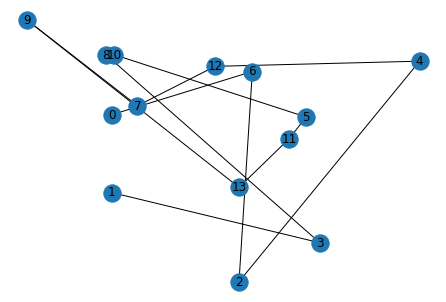

Concorde s done: 1002
TSP ID: 1003
concorde has started 1592735941.0017574
concorde has finished 1592735941.073276
True
Concorde solution: 0.0


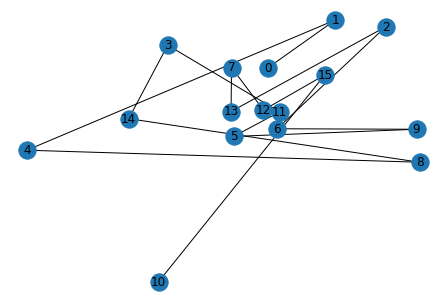

Concorde s done: 1003
TSP ID: 1006
concorde has started 1592735941.3213365
concorde has finished 1592735941.442437
True
Concorde solution: 0.0


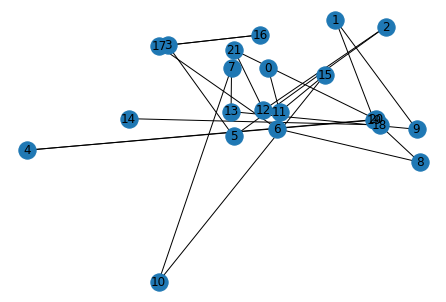

Concorde s done: 1006
TSP ID: 1013
concorde has started 1592735941.7404425
concorde has finished 1592735941.8593671
True
Concorde solution: 33522.0


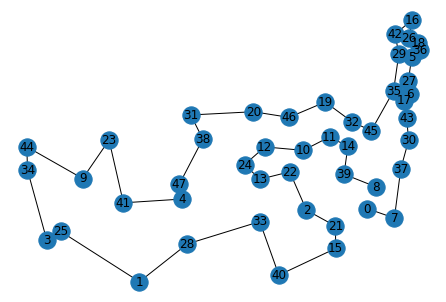

Concorde s done: 1013
TSP ID: 1016
concorde has started 1592735942.1892347
concorde has finished 1592735942.2642868
True
Concorde solution: 426.0


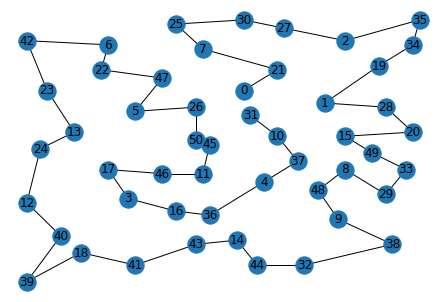

Concorde s done: 1016
TSP ID: 1017
concorde has started 1592735942.6109135
concorde has finished 1592735942.6860614
True
Concorde solution: 7542.0


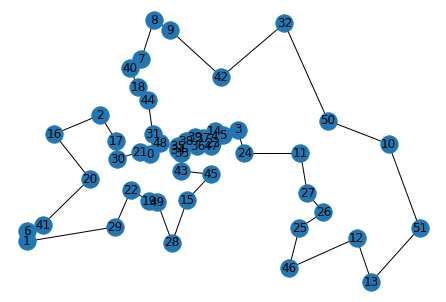

Concorde s done: 1017
TSP ID: 1019
concorde has started 1592735943.20288
concorde has finished 1592735943.323082
True
Concorde solution: 675.0


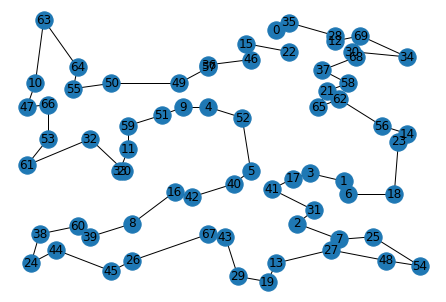

Concorde s done: 1019
TSP ID: 1020
concorde has started 1592735943.7495825
concorde has finished 1592735943.8277035
True
Concorde solution: 538.0


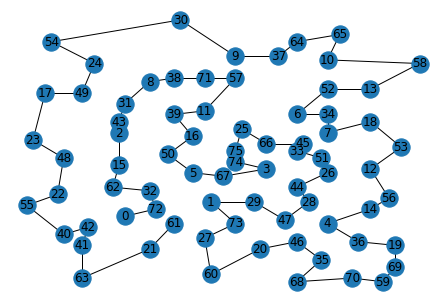

Concorde s done: 1020
TSP ID: 1021
concorde has started 1592735945.7832527
concorde has finished 1592735946.177235
True
Concorde solution: 108159.0


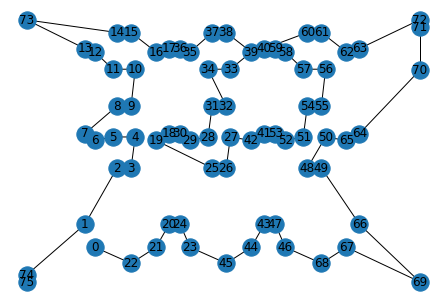

Concorde s done: 1021
TSP ID: 1022
concorde has started 1592735946.7697816
concorde has finished 1592735947.784844
True
Concorde solution: 1.0


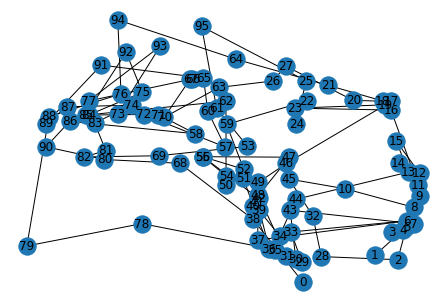

Concorde s done: 1022
TSP ID: 1023
concorde has started 1592735948.3281784
concorde has finished 1592735948.5156982
True
Concorde solution: 1211.0


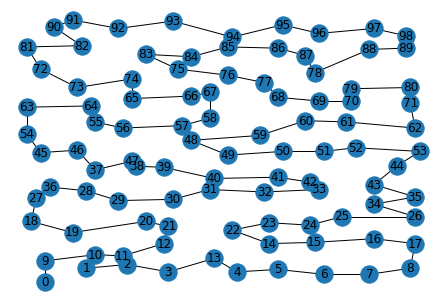

Concorde s done: 1023
TSP ID: 1024
concorde has started 1592735949.057058
concorde has finished 1592735949.2152069
True
Concorde solution: 21282.0


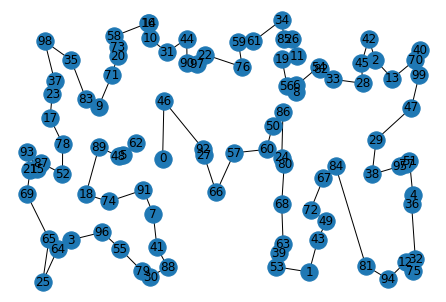

Concorde s done: 1024
TSP ID: 1025
concorde has started 1592735949.892073
concorde has finished 1592735950.1568499
True
Concorde solution: 22141.0


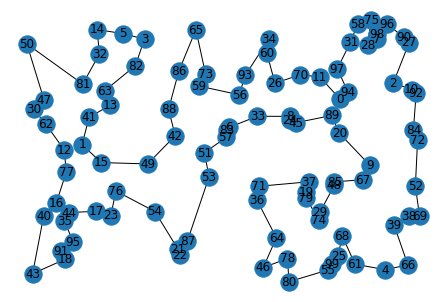

Concorde s done: 1025
TSP ID: 1026
concorde has started 1592735950.7154183
concorde has finished 1592735950.85716
True
Concorde solution: 20749.0


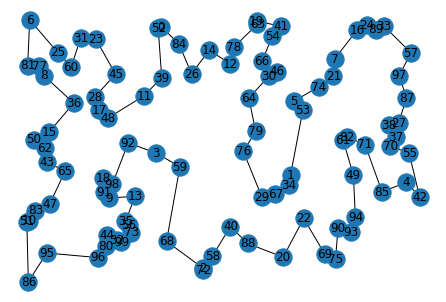

Concorde s done: 1026
TSP ID: 1027
concorde has started 1592735951.4139192
concorde has finished 1592735951.6118078
True
Concorde solution: 21294.0


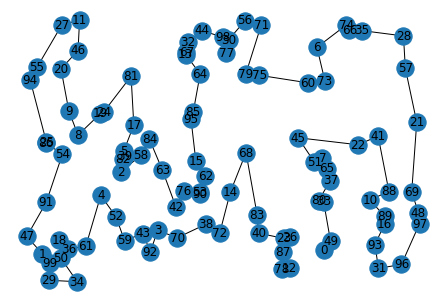

Concorde s done: 1027
TSP ID: 1028
concorde has started 1592735952.253713
concorde has finished 1592735952.5647159
True
Concorde solution: 22068.0


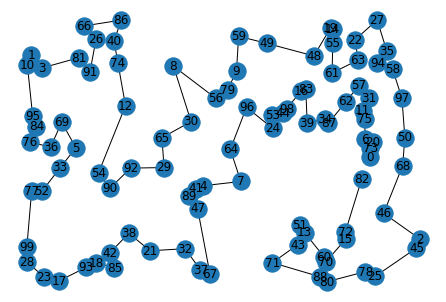

Concorde s done: 1028
TSP ID: 1029
concorde has started 1592735953.1204991
concorde has finished 1592735953.2644424
True
Concorde solution: 7910.0


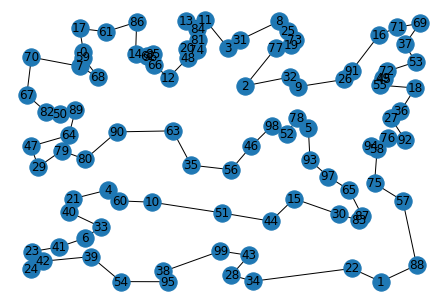

Concorde s done: 1029
TSP ID: 1030
concorde has started 1592735953.9258437
concorde has finished 1592735954.0892234
True
Concorde solution: 629.0


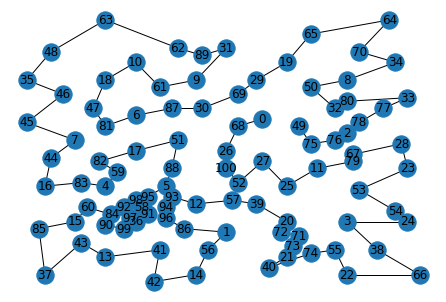

Concorde s done: 1030
TSP ID: 1032
concorde has started 1592735954.686096
concorde has finished 1592735954.9164367
True
Concorde solution: 44303.0


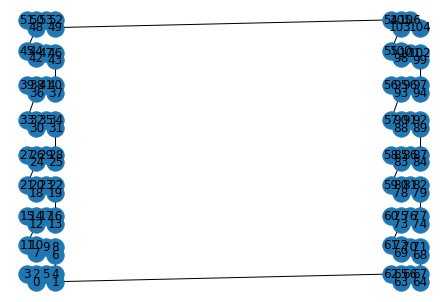

Concorde s done: 1032
TSP ID: 1034
concorde has started 1592735955.5494373
concorde has finished 1592735955.9410255
True
Concorde solution: 59030.0


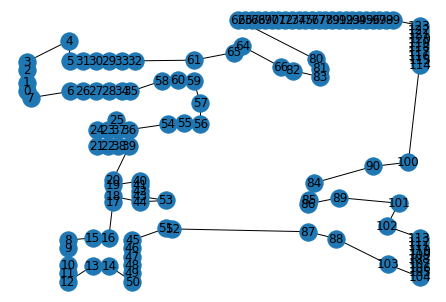

Concorde s done: 1034
TSP ID: 1035
concorde has started 1592735956.7132828
concorde has finished 1592735957.0259876
True
Concorde solution: 118282.0


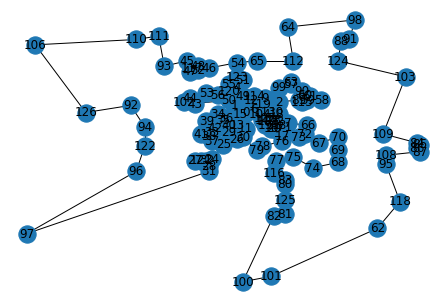

Concorde s done: 1035
TSP ID: 1036
concorde has started 1592735957.7592773
concorde has finished 1592735958.0836997
True
Concorde solution: 6110.0


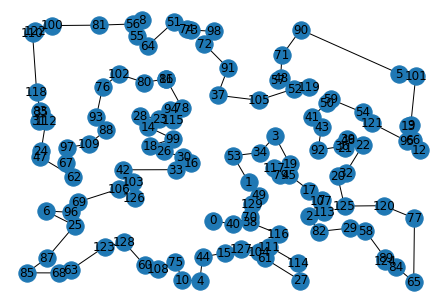

Concorde s done: 1036
TSP ID: 1037
concorde has started 1592735958.890799
concorde has finished 1592735959.4764712
True
Concorde solution: 96772.0


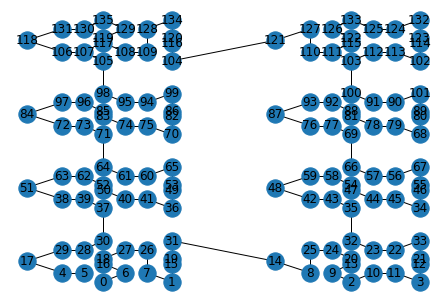

Concorde s done: 1037
TSP ID: 1038
concorde has started 1592735960.3172567
concorde has finished 1592735961.6972923
True
Concorde solution: 1.0


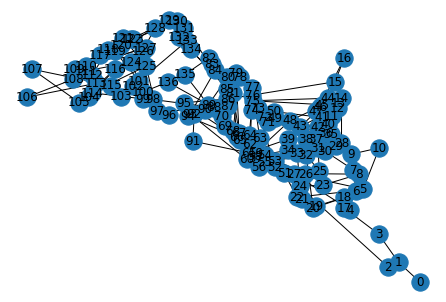

Concorde s done: 1038
TSP ID: 1039
concorde has started 1592735962.471669
concorde has finished 1592735962.9584908
True
Concorde solution: 58537.0


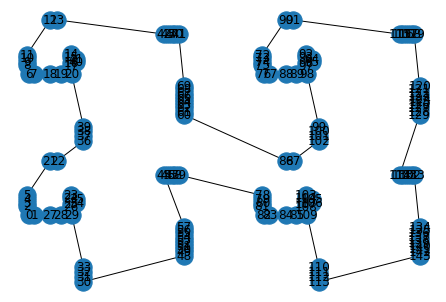

Concorde s done: 1039
TSP ID: 1040
concorde has started 1592735963.836405
concorde has finished 1592735964.2884705
True
Concorde solution: 6528.0


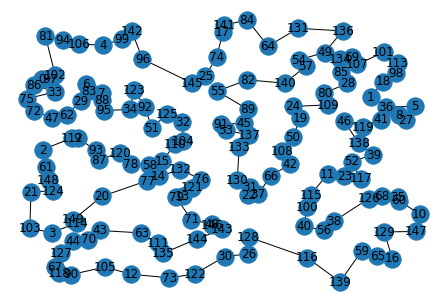

Concorde s done: 1040
TSP ID: 1041
concorde has started 1592735965.1779397
concorde has finished 1592735966.023843
True
Concorde solution: 26524.0


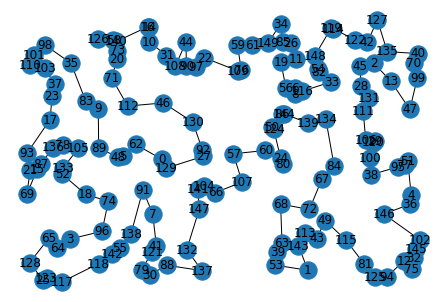

Concorde s done: 1041
TSP ID: 1042
concorde has started 1592735966.8967493
concorde has finished 1592735967.3436573
True
Concorde solution: 26130.0


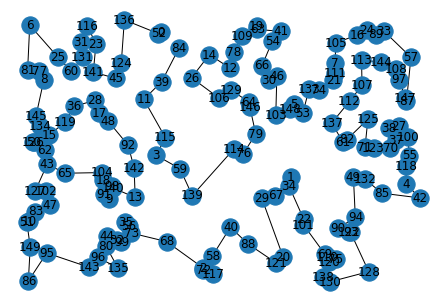

Concorde s done: 1042
TSP ID: 1043
concorde has started 1592735968.2717235
concorde has finished 1592735969.4165657
True
Concorde solution: 73682.0


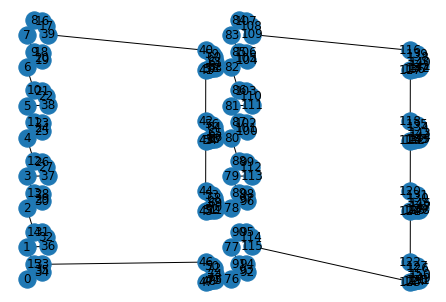

Concorde s done: 1043
TSP ID: 1044
concorde has started 1592735970.271971
concorde has finished 1592735970.5100143
True
Concorde solution: 42080.0


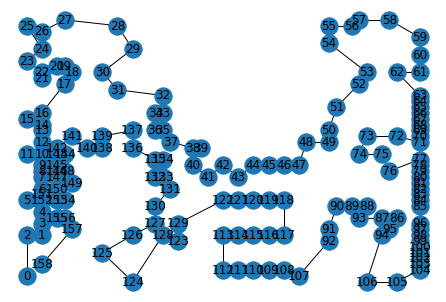

Concorde s done: 1044
TSP ID: 1046
concorde has started 1592735971.660772
concorde has finished 1592735976.0638351
True
Concorde solution: 2323.0


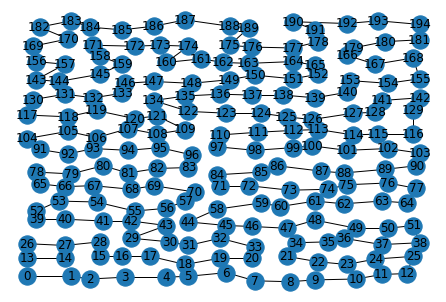

Concorde s done: 1046
TSP ID: 1047
concorde has started 1592735977.2487736
concorde has finished 1592735978.9082675
True
Concorde solution: 15780.0


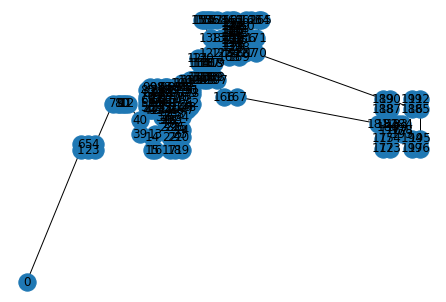

Concorde s done: 1047
TSP ID: 1048
concorde has started 1592735980.0864
concorde has finished 1592735980.7611234
True
Concorde solution: 29368.0


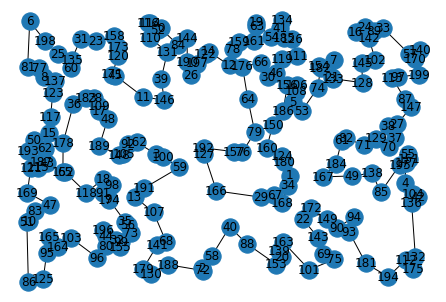

Concorde s done: 1048
TSP ID: 1049
concorde has started 1592735981.9538286
concorde has finished 1592735982.417307
True
Concorde solution: 29437.0


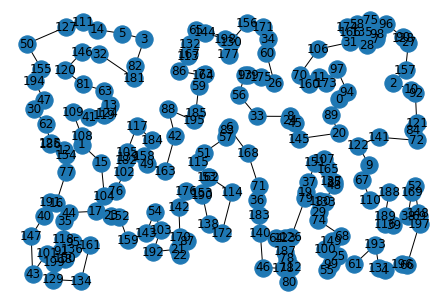

Concorde s done: 1049
TSP ID: 1050
concorde has started 1592735983.6498525
concorde has finished 1592735986.6118386
True
Concorde solution: 2.0


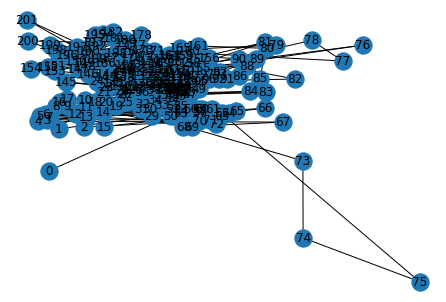

Concorde s done: 1050
TSP ID: 1052
concorde has started 1592735989.4424891
concorde has finished 1592735999.0080197
True
Concorde solution: 126643.0


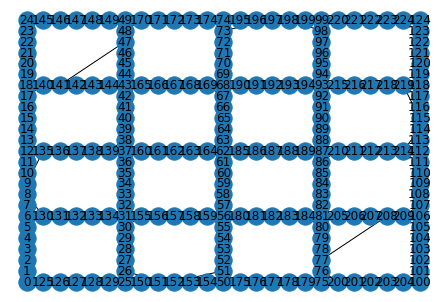

Concorde s done: 1052
TSP ID: 1051
concorde has started 1592736000.4303143
concorde has finished 1592736002.0371397
True
Concorde solution: 3916.0


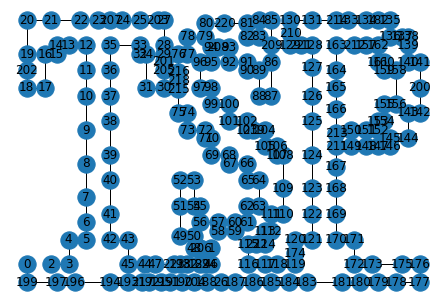

Concorde s done: 1051
TSP ID: 1053
concorde has started 1592736003.4199982
concorde has finished 1592736003.9687424
True
Concorde solution: 80369.0


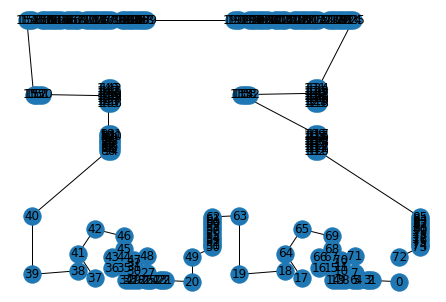

Concorde s done: 1053
TSP ID: 1054
concorde has started 1592736005.4293294
concorde has finished 1592736008.5982761
True
Concorde solution: 6.0


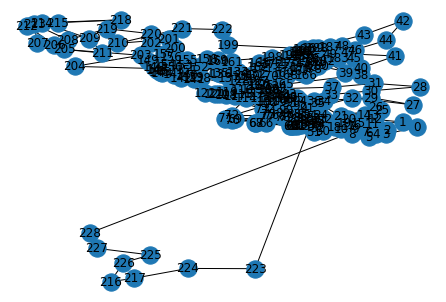

Concorde s done: 1054
TSP ID: 1055
concorde has started 1592736010.3182414
concorde has finished 1592736012.6620538
True
Concorde solution: 2378.0


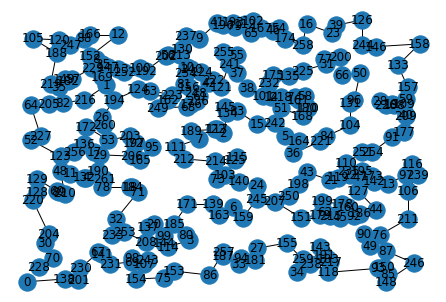

Concorde s done: 1055
TSP ID: 1056
concorde has started 1592736014.4341626
concorde has finished 1592736014.947658
True
Concorde solution: 49135.0


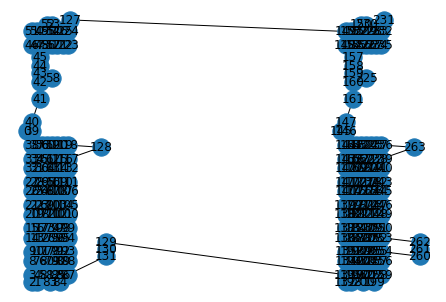

Concorde s done: 1056
TSP ID: 1057
concorde has started 1592736016.8544567
concorde has finished 1592736017.591194
True
Concorde solution: 2579.0


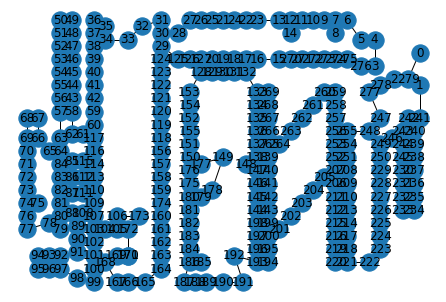

Concorde s done: 1057
TSP ID: 1058
concorde has started 1592736019.7637663
concorde has finished 1592736021.6400285
True
Concorde solution: 48191.0


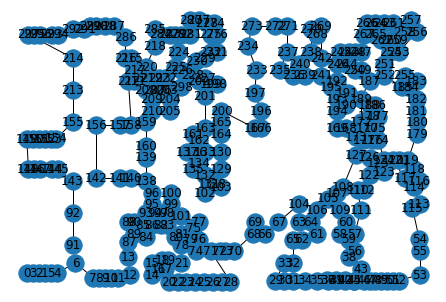

Concorde s done: 1058
TSP ID: 1059
concorde has started 1592736023.9099386
concorde has finished 1592736025.7046356
True
Concorde solution: 42029.0


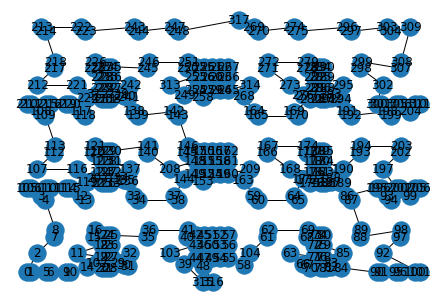

Concorde s done: 1059
TSP ID: 1060
concorde has started 1592736028.906843
concorde has finished 1592736056.8239937
True
Concorde solution: 15281.0


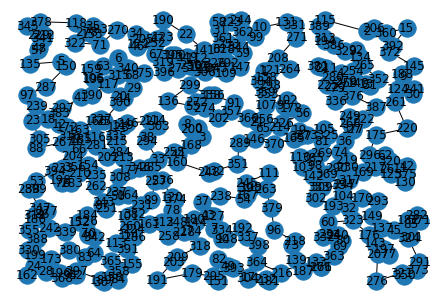

Concorde s done: 1060
TSP ID: 1061
concorde has started 1592736060.3620217
concorde has finished 1592736069.0363412
True
Concorde solution: 11861.0


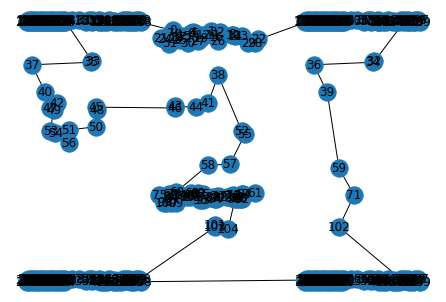

Concorde s done: 1061
TSP ID: 1062
concorde has started 1592736072.8080235
concorde has finished 1592736079.4501278
True
Concorde solution: 5.0


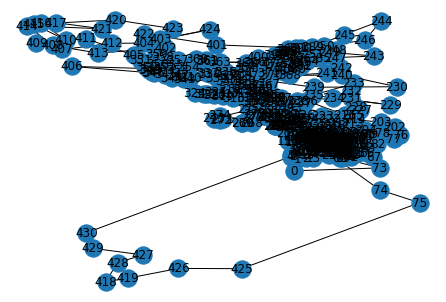

Concorde s done: 1062
TSP ID: 1063
concorde has started 1592736083.3324769
concorde has finished 1592736109.9004347
True
Concorde solution: 107217.0


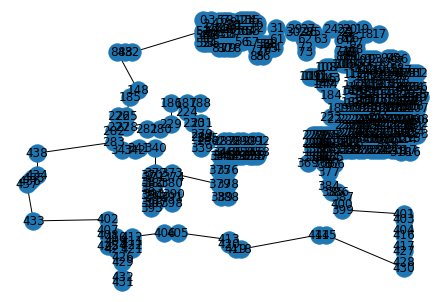

Concorde s done: 1063
TSP ID: 1064
concorde has started 1592736114.4889154
concorde has finished 1592736196.0603707
True
Concorde solution: 1e+30


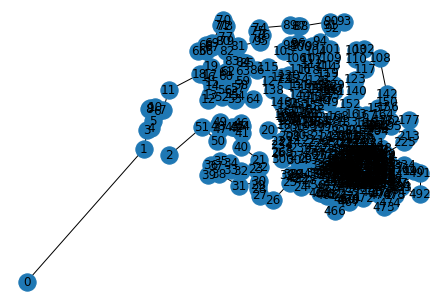

Concorde s done: 1064
TSP ID: 1065
concorde has started 1592736201.4576492
concorde has finished 1592736227.5325763
True
Concorde solution: 86729.0


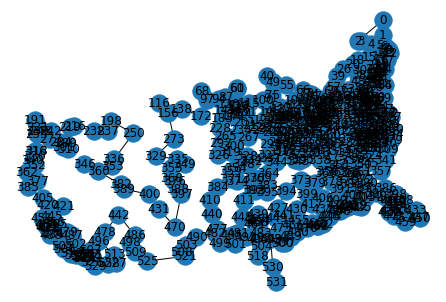

Concorde s done: 1065
TSP ID: 1066
concorde has started 1592736232.9766684
concorde has finished 1592736240.6880176
True
Concorde solution: 3.0


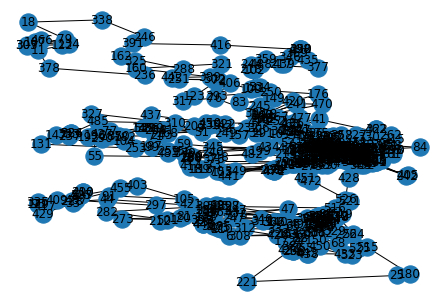

Concorde s done: 1066
TSP ID: 1069
concorde has started 1592736246.7117379
concorde has finished 1592736254.0116348
True
Concorde solution: 36905.0


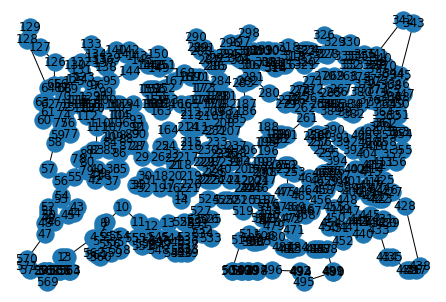

Concorde s done: 1069
TSP ID: 1070
concorde has started 1592736260.1533399
concorde has finished 1592736313.8066669
True
Concorde solution: 6773.0


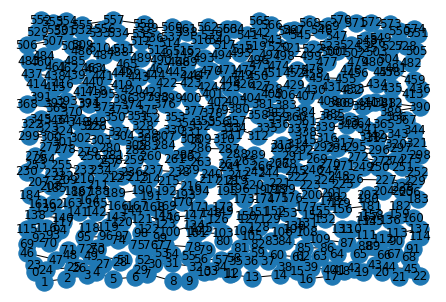

Concorde s done: 1070
TSP ID: 1072
concorde has started 1592736321.6253052
concorde has finished 1592736367.3838983
True
Concorde solution: 48913.0


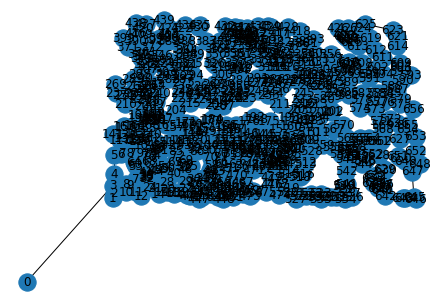

Concorde s done: 1072
TSP ID: 1073
concorde has started 1592736375.3524241
concorde has finished 1592736386.2232735
True
Concorde solution: 5.0


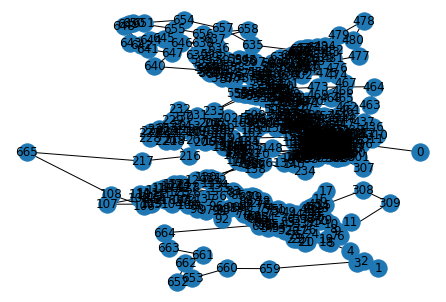

Concorde s done: 1073
TSP ID: 1074
concorde has started 1592736395.3684506
concorde has finished 1592736434.8389773
True
Concorde solution: 41910.0


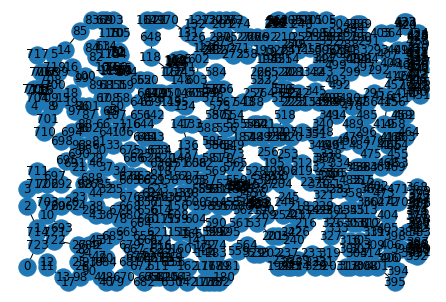

Concorde s done: 1074
TSP ID: 1075
concorde has started 1592736445.6913893
concorde has finished 1592736453.924168
True
Concorde solution: 8806.0


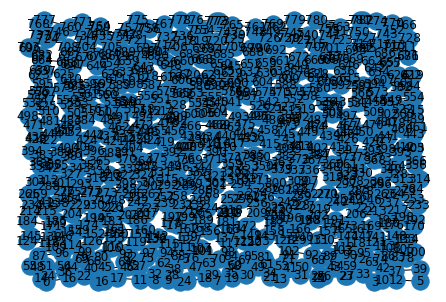

Concorde s done: 1075


In [ ]:
for k in range(len(tsp_list)): 
    
    tsp_id = tsp_list[k][0]
    print('TSP ID:', tsp_id)
    data_name = tsp_list[k][1]
    benchmark1 = benchmark(tsp_id, data_name, verbose)
     
    obj1= {'tsp_id': tsp_id,
            'data_name': data_name,
            'con_complete_flag': benchmark1.con_complete_flag, 
            'con_optimal_value': benchmark1.con_optimal_value, 
            'con_time_diff': benchmark1.con_time_diff}
            #'mip_time_diff': benchmark1.mip_time_diff,
            #'mip_count_subtours': benchmark1.mip_count_subtours,
            #'mip_complete_flag': benchmark1.mip_complete_flag,
            #'mip_objective': benchmark1.mip_objective, 
            #'rand1_time_diff': benchmark1.rand1_time_diff,
            #'rand1_count_iters': benchmark1.rand1_count_iters,
            #'rand1_complete_flag': benchmark1.rand1_complete_flag,
            #'rand1_objective': benchmark1.rand1_objective,
            #'rand2_time_diff': benchmark1.rand2_time_diff,
            #'rand2_count_iters': benchmark1.rand2_count_iters,
            #'rand2_complete_flag': benchmark1.rand2_complete_flag,
            #'rand2_objective': benchmark1.rand2_objective}
    
    collect_all = collect_all.append(pd.DataFrame(obj1, index=[0])) 
    optimal_tours.append(benchmark1.optimal_tour)  

    if tsp_id%30 == 0: 
      collect_all.to_csv("test_benchmark.csv")
      files.download("test_benchmark.csv")

In [ ]:
collect_all.to_csv("test_benchmark.csv")
files.download("test_benchmark.csv")